In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


In [3]:
train = pd.read_csv("../input/train.csv")
train.head()


,id,has_cactus
0,2de8f189f1dce439766637e75df0ee27.jpg,1
1,36704d250f236238e7f996812c48235d.jpg,1
2,eacde22fdc8c175972a5768e3daa8bc9.jpg,1
3,5d442f834da5e57d22b24802c32a8ca8.jpg,1
4,152491e0daf75c0e669400300ff7e645.jpg,1


In [4]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

X_train, X_val, Y_train, Y_val = train_test_split(train.id, train.has_cactus, test_size=0.2)


2025-08-18 19:37:49.026515: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755545869.039443       8 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755545869.043333       8 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-18 19:37:49.058626: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
import os
from os.path import join

#load training images
catctus_dir = '../input/train/train'

#get full image paths for train/val
train_paths = [join(catctus_dir,filename) for filename in X_train]
val_paths = [join(catctus_dir,filename) for filename in X_val]

train_paths[0:5]


['../input/train/train/01b3a6134a9047a8b0a7d9a4b57005b6.jpg',
 '../input/train/train/9ebcf9647c524de1cf4885434b03c8fb.jpg',
 '../input/train/train/016804cdc79017b47253d81d1109adb0.jpg',
 '../input/train/train/cded169e997d07ae08612c89f0f8b35c.jpg',
 '../input/train/train/f7f40ef130cf88f643ba6c57088a2cb7.jpg']

In [6]:
from IPython.display import Image, display
for i, img_path in enumerate(train_paths[0:5]):
    display(Image(img_path))
#yup, those are cacti


FileNotFoundError: No such file or directory: '../input/train/train/01b3a6134a9047a8b0a7d9a4b57005b6.jpg'

FileNotFoundError: No such file or directory: '../input/train/train/01b3a6134a9047a8b0a7d9a4b57005b6.jpg'

<IPython.core.display.Image object>

FileNotFoundError: No such file or directory: '../input/train/train/9ebcf9647c524de1cf4885434b03c8fb.jpg'

FileNotFoundError: No such file or directory: '../input/train/train/9ebcf9647c524de1cf4885434b03c8fb.jpg'

<IPython.core.display.Image object>

FileNotFoundError: No such file or directory: '../input/train/train/016804cdc79017b47253d81d1109adb0.jpg'

FileNotFoundError: No such file or directory: '../input/train/train/016804cdc79017b47253d81d1109adb0.jpg'

<IPython.core.display.Image object>

FileNotFoundError: No such file or directory: '../input/train/train/cded169e997d07ae08612c89f0f8b35c.jpg'

FileNotFoundError: No such file or directory: '../input/train/train/cded169e997d07ae08612c89f0f8b35c.jpg'

<IPython.core.display.Image object>

FileNotFoundError: No such file or directory: '../input/train/train/f7f40ef130cf88f643ba6c57088a2cb7.jpg'

FileNotFoundError: No such file or directory: '../input/train/train/f7f40ef130cf88f643ba6c57088a2cb7.jpg'

<IPython.core.display.Image object>

In [7]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#image size
img_rows, img_cols, image_size = 32, 32, 32

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = prep_data(img_array)
    return(output)

#training data has its labels already split out
def prep_data(raw):
    x = raw[:,0:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 3)
    out_x = out_x / 255
    return out_x


In [8]:
train_data = read_and_prep_images(train_paths)
val_data = read_and_prep_images(val_paths)


FileNotFoundError: [Errno 2] No such file or directory: '../input/train/train/01b3a6134a9047a8b0a7d9a4b57005b6.jpg'

In [9]:
np.shape(train_data) #14000 train images, 3,500 val images


NameError: name 'train_data' is not defined

In [10]:
from tensorflow import keras
#cactus or no
num_classes = 2

train_labels = keras.utils.to_categorical(Y_train, num_classes)
val_labels = keras.utils.to_categorical(Y_val, num_classes)


NameError: name 'train_data' is not defined

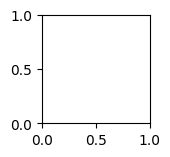

In [11]:
import matplotlib.pyplot as plt

#view a couple of the training images
for i in range(1,13):
    plt.subplot(3,4,i)
    plt.imshow(train_data[i-1])
#moar cacti


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D

#build the model
cactus_model = Sequential()
cactus_model.add(Conv2D(12, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 3))) #activation layer

#additional learning layers
cactus_model.add(Conv2D(20, kernel_size=(3, 3), padding='valid', activation='relu'))
cactus_model.add(Conv2D(20, kernel_size=(3, 3), padding='valid', activation='relu'))
cactus_model.add(Conv2D(20, kernel_size=(3, 3), padding='valid', activation='relu'))
cactus_model.add(Conv2D(20, kernel_size=(3, 3), padding='valid', activation='relu'))

#final prediction layers
cactus_model.add(Flatten())
cactus_model.add(Dense(100, activation='relu'))
cactus_model.add(Dense(num_classes, activation='softmax'))

#compile the model
cactus_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-18 19:37:54.619527: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
#initial fit with validation
history = cactus_model.fit(train_data, train_labels,
          batch_size=100,
          epochs=10,
          validation_data = (val_data, val_labels))


NameError: name 'train_data' is not defined

NameError: name 'history' is not defined

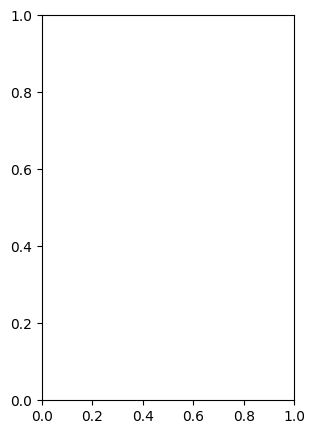

In [14]:
#https://www.kaggle.com/pheaboo/simple-cnn-trained-from-scratch
plt.figure(figsize=(15,5))

plt.subplot(141)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('# Epochs')
plt.legend()
plt.ylabel("Loss - Binary Cross Entropy")
plt.title('Loss Evolution')

plt.subplot(142)
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.ylim(0,0.3)
plt.xlabel('# Epochs')
plt.legend()
plt.ylabel("Loss - Binary Cross Entropy")
plt.title('Zoom Near Zero - Loss Evolution')

plt.subplot(143)
plt.plot(history.history['acc'], label='training')
plt.plot(history.history['val_acc'], label='validation')
plt.xlabel('# Epochs')
plt.ylabel("Accuracy")
plt.legend()
plt.title('Accuracy Evolution')

plt.subplot(144)
plt.plot(history.history['acc'], label='training')
plt.plot(history.history['val_acc'], label='validation')
plt.ylim(0.9,1)
plt.xlabel('# Epochs')
plt.ylabel("Accuracy")
plt.legend()
plt.title('Zoom Near One - Accuracy Evolution')


In [15]:
#build the model, same as above
cactus_model_aug = Sequential()
cactus_model_aug.add(Conv2D(12, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 3))) #activation layer

#additional learning layers
cactus_model_aug.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
cactus_model_aug.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
cactus_model_aug.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
cactus_model_aug.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))

#final prediction layers
cactus_model_aug.add(Flatten())
cactus_model_aug.add(Dense(100, activation='relu'))
cactus_model_aug.add(Dense(num_classes, activation='softmax'))

#compile the model
cactus_model_aug.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(train_data)


NameError: name 'train_data' is not defined

In [17]:
cactus_model_aug.fit_generator(datagen.flow(train_data,train_labels),
                              epochs = 15, validation_data = (val_data,val_labels), steps_per_epoch=20)


AttributeError: 'Sequential' object has no attribute 'fit_generator'

In [18]:
#aug was NOT better


In [19]:
test_dir = '../input/test/test'
test_paths = [join(test_dir,filename) for filename in os.listdir(test_dir)]
test_paths[0:5]


FileNotFoundError: [Errno 2] No such file or directory: '../input/test/test'

In [20]:
len(os.listdir(test_dir))


FileNotFoundError: [Errno 2] No such file or directory: '../input/test/test'

In [21]:
from IPython.display import Image, display
for i, img_path in enumerate(test_paths[0:5]):
    display(Image(img_path))


NameError: name 'test_paths' is not defined

In [22]:
test_data = read_and_prep_images(test_paths)


NameError: name 'test_paths' is not defined

In [23]:
np.shape(test_data)


NameError: name 'test_data' is not defined

In [24]:
#Get predictions
preds_test = cactus_model.predict(test_data)

# #the model returns a list of probabilities for each outcome. 
realPreds = preds_test[:,0]
realPreds[0:12]


NameError: name 'test_data' is not defined

In [25]:
# Save test predictions to file
# no aug performed better
output = pd.DataFrame({'id': os.listdir(test_dir),
                       'has_cactus': realPreds})
output.to_csv('submission.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: '../input/test/test'